In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv(r"Spotify_Youtube Dataset.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [9]:
data.drop(columns=["Unnamed: 0", "Url_spotify" , "Uri", "Url_youtube"], inplace = True) 

In [12]:
data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [16]:
data['likes'] = data['Likes'].fillna(0)
data['Comments'] = data['Comments'].fillna(0)

In [19]:
data.dropna(inplace = True)

1) Top 10 artist with the highest views on youtube

In [31]:
data.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

2. Top 10 Tracks with highest streams on Spotify

In [ ]:
x = data[["Track", "Stream"]] #another way is by having 2 columns in a df

In [ ]:
x.sort_values(by = ["Stream"], ascending=False).head(10) #ordering them based on stream

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16028,Closer,2.456205e+09
16099,Closer,2.456205e+09
14030,Believer,2.369272e+09


3. Most common album types on spotify? how many tracks belong to each album type?

In [54]:
a_type = data['Album_type'].value_counts()
a_type

Album_type
album          13896
single          4646
compilation      691
Name: count, dtype: int64

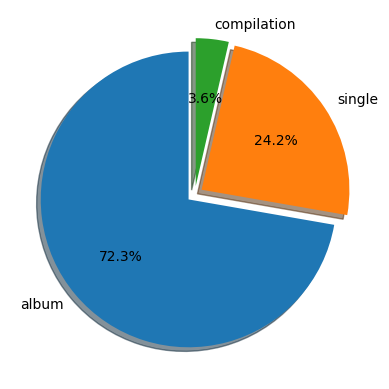

In [79]:
plt.pie(a_type, labels=a_type.index, autopct='%1.1f%%', startangle = 90, shadow= True, explode = (0.055,0.055,0.0555))

plt.show()

4. How do the Average Views, Likes and comments are compared between different Album Types

In [85]:
df = data.groupby("Album_type")[["Views", "Likes", "Comments"]].mean()

In [86]:
df = df.reset_index()

In [89]:
df__melted = pd.melt(df, id_vars='Album_type', var_name = 'Attribute', value_name = "total")
df__melted

,Album_type,Attribute,total
0,album,Views,1.017609e+08
1,compilation,Views,8.524610e+07
2,single,Views,8.486853e+07
3,album,Likes,6.753041e+05
4,compilation,Likes,5.458511e+05
5,single,Likes,7.233545e+05
6,album,Comments,2.913645e+04
7,compilation,Comments,1.812459e+04
8,single,Comments,2.728500e+04


<Axes: xlabel='Album_type', ylabel='total'>

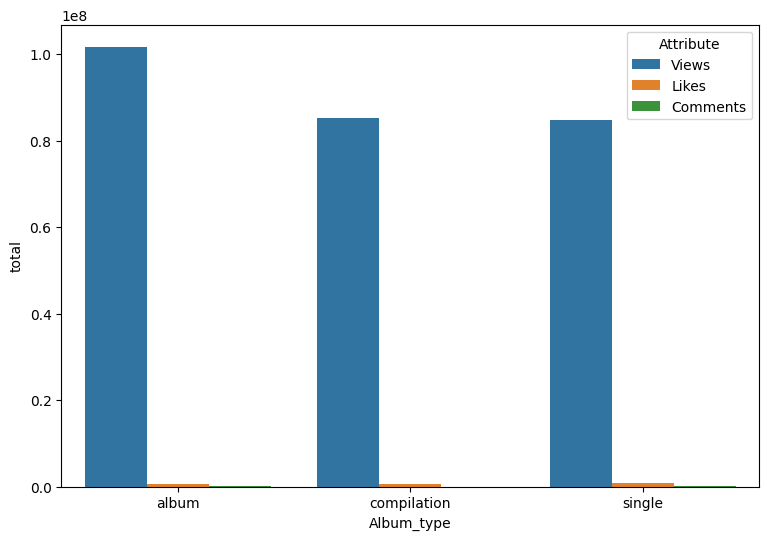

In [97]:
plt.figure(figsize= (9,6))
sns.barplot( x = 'Album_type' , y='total', hue = "Attribute", data = df__melted)

5. Top 5 Channels based on views 

In [107]:
a = data.groupby('Channel')['Views'].sum().sort_values(ascending=False).head(5).reset_index()
a

,Channel,Views
0,T-Series,4.779864e+10
1,LuisFonsiVEVO,2.170252e+10
2,CalvinHarrisVEVO,1.828114e+10
3,Macklemore,1.700341e+10
4,Ed Sheeran,1.691822e+10


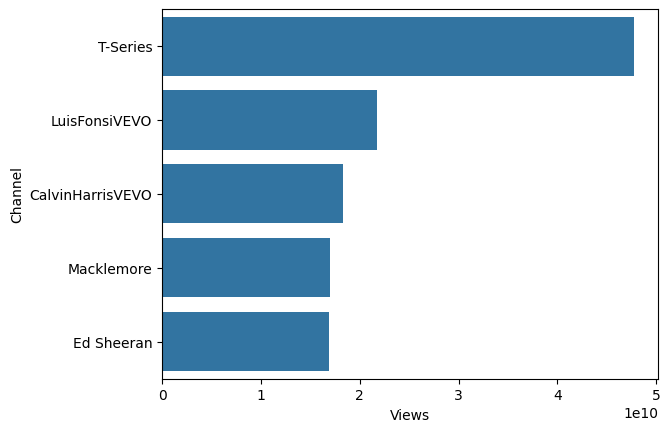

In [109]:
# sns.set_style("White")
sns.barplot(x = "Views", y = "Channel", data = a)
plt.show()

6. Top most track based on views 

In [110]:
data.sort_values(by = 'Views', ascending=False).head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,likes
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09,50788652.0


7. Top 7 Tracks which have highest Like to view ratio on youtube

In [116]:
like_Likes_views = data[["Track","Likes", "Views"]]
like_Likes_views

,Track,Likes,Views
0,Feel Good Inc.,6220896.0,693555221.0
1,Rhinestone Eyes,1079128.0,72011645.0
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0
3,On Melancholy Hill,1788577.0,211754952.0
4,Clint Eastwood,6197318.0,618480958.0
...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0
20716,ONLY GIRL HARDSTYLE,88.0,6533.0


In [122]:
like_Likes_views['LV_ratio'] = data['Likes']/data['Views'] *100
like_Likes_views.sort_values(by = 'LV_ratio',ascending=False).head(7)

C:\Users\itsun\AppData\Local\Temp\ipykernel_1980\516375489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  like_Likes_views['LV_ratio'] = data['Likes']/data['Views'] *100


,Track,Likes,Views,LV_ratio
19968,Intro,237761.0,954081.0,24.920421
19969,Safety Zone,453910.0,1952637.0,23.246000
19967,Future,250116.0,1180522.0,21.186899
19971,Pandora's Box,253702.0,1265231.0,20.051832
16297,My Universe - Galantis Remix,371437.0,2067753.0,17.963316
15065,Burn It (feat. MAX),188244.0,1054438.0,17.852543
8105,No.2 (with parkjiyoon),346440.0,2050047.0,16.899125


8. Top albums having the tracks with maximum danceablity

In [131]:
Danceability= data.groupby('Album')['Danceability'].sum().sort_values(ascending=False)
Danceability

Album
Greatest Hits                                  17.356
Hamilton (Original Broadway Cast Recording)    16.610
HEROES & VILLAINS                              14.300
RODZINNY BIZNES                                13.491
An Evening With Silk Sonic                     13.349
                                                ...  
You And The Night                               0.000
Relaxing Loopable White Noise                   0.000
Hello, Dolly! (Remastered)                      0.000
White Noise                                     0.000
The Three Tenors - The Best of the 3 Tenors     0.000
Name: Danceability, Length: 11255, dtype: float64

In [135]:
data[data.Album == 'Greatest Hits']

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,likes
220,2Pac,Hit 'Em Up - Single Version,Greatest Hits,compilation,0.916,0.844,7.0,-3.967,0.2360,0.0394,...,2Pac - Hit 'Em Up (Dirty) (Music Video) HD,Seven Hip-Hop,585712131.0,4363164.0,208460.0,Music video by 2Pac performing Hit 'Em Up (Dir...,False,False,375955728.0,4363164.0
222,2Pac,California Love - Original Version,Greatest Hits,compilation,0.763,0.850,7.0,-3.052,0.0417,0.0304,...,2Pac ft. Dr. Dre - California Love (Official V...,UPROXX Video,84654029.0,484619.0,12875.0,2Pac ft. Dr. Dre - California Love (Full Video...,False,False,497213287.0,484619.0
225,2Pac,Changes,Greatest Hits,compilation,0.865,0.665,7.0,-6.289,0.0730,0.0453,...,2pac - Changes Original Music Video,The Best,306542.0,4350.0,305.0,2pac - Changes Original Music Video,False,False,411056377.0,4350.0
268,Fleetwood Mac,Gypsy,Greatest Hits,compilation,0.622,0.540,5.0,-13.990,0.0261,0.0170,...,Fleetwood Mac - Gypsy (Official Music Video),Fleetwood Mac,81512369.0,436530.0,17764.0,You're watching the official music video for F...,True,True,213673856.0,436530.0
1232,Bruce Springsteen,Streets of Philadelphia - Single Edit,Greatest Hits,compilation,0.741,0.290,5.0,-13.251,0.0302,0.2940,...,Bruce Springsteen - Streets of Philadelphia (O...,BruceSpringsteenVEVO,171514802.0,669935.0,25407.0,"Official Video of ”Streets Of Philadelphia"" by...",True,True,239663934.0,669935.0
1236,Bruce Springsteen,Secret Garden,Greatest Hits,compilation,0.520,0.329,0.0,-14.224,0.0266,0.5760,...,"Bruce Springsteen Secret Garden HD, Jerry Magu...",VJ,25696359.0,104022.0,4674.0,My music video of Bruce Springsteen's beautifu...,False,False,69059523.0,104022.0
1862,Shania Twain,From This Moment On - Pop On-Tour Version,Greatest Hits,compilation,0.460,0.505,9.0,-5.487,0.0266,0.4200,...,From This Moment On (Pop On-Tour Version),Shania Twain - Topic,2629831.0,30669.0,65.0,Provided to YouTube by Universal Music Group\n...,True,True,84623227.0,30669.0
2164,Wyclef Jean,Killing Me Softly With His Song,Greatest Hits,compilation,0.765,0.437,4.0,-10.122,0.0727,0.0271,...,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,351401822.0,2549466.0,42859.0,"""Killing Me Softly With His Song"" by Fugees\n\...",True,True,518080621.0,2549466.0
3079,Tracy Chapman,Stand by Me - Live at the Late Show with David...,Greatest Hits,compilation,0.816,0.144,7.0,-10.148,0.0398,0.7970,...,Tracy Chapman - Stand by Me (Live on Letterman...,Tracy Chapman Online,16971605.0,134753.0,0.0,♥ Subscribe our newsletter ► https://www.about...,False,False,44060055.0,134753.0
3097,Blondie,Maria,Greatest Hits,compilation,0.548,0.800,9.0,-6.926,0.0597,0.0380,...,Maria - Blondie,Paola1311,70126379.0,263063.0,9124.0,"Blondie, Maria",False,False,90857487.0,263063.0


9. Correlation Between Views, Likes, Comments and stream

In [138]:
df_vlcs= data[['Views', 'Likes', 'Comments', 'Stream']]
df_vlcs

,Views,Likes,Comments,Stream
0,693555221.0,6220896.0,169907.0,1.040235e+09
1,72011645.0,1079128.0,31003.0,3.100837e+08
2,8435055.0,282142.0,7399.0,6.306347e+07
3,211754952.0,1788577.0,55229.0,4.346636e+08
4,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...
20713,71678.0,1113.0,0.0,9.227144e+06
20714,164741.0,2019.0,0.0,1.089818e+07
20715,35646.0,329.0,0.0,6.226110e+06
20716,6533.0,88.0,0.0,6.873961e+06


In [139]:
df_vlcs.corr()

,Views,Likes,Comments,Stream
Views,1.000000,0.891723,0.431065,0.603545
Likes,0.891723,1.000000,0.631104,0.656087
Comments,0.431065,0.631104,1.000000,0.267931
Stream,0.603545,0.656087,0.267931,1.000000


<Axes: >

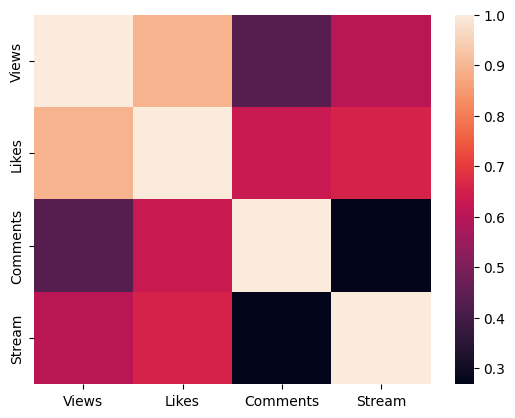

In [140]:
sns.heatmap(df_vlcs.corr())